<a href="https://colab.research.google.com/github/wansang93/AI/blob/master/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B8%B0%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 예시문제

### 작업1유형
mtcars 데이터셋(mtcars.csv)의 qsec 컬럼을 최소 최대 척도(Min-Max Scale)로 변환한 후 0.5보다 큰 값을 가지는 레코드 수를 구하시오.

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/mtcars.csv')
df.head(2)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


In [ ]:
# min_max_scaler 직접구현하는 방법


In [ ]:
# sklearn의 MinMaxScaler 객체를 사용하는 방법


다음은 추가적으로 알아보는 내용입니다.

In [ ]:
# Standard Scaler 함수 생성


In [ ]:
# StandardScaler 객체 사용


### 작업2유형 - 2진분류, roc_auc


**2-01. 문제이해**

제공된 데이터는 백화점 고객이 1년간 상품을 구매한 속성데이터이다. 제공된 학습용 데이터(data/customer_train.csv)를 이용하여 백화점 구매 고객의 성별을 예측하는 모델을 개발하고, 개발한 모델에 기반하여 평가용 데이터(data/customer_test.csv)에 적용하여 얻은 성별 예측 결과를 아래 [제출형식]에 따라 csv 파일로 생성하여 제출하시오.
- 예측 결과는 ROC-AUC 평가지표에 따라 평가함
- 성능이 우수한 예측 모델을 구축하기 위해서는 데이터 정제, Feature Engineering, 하이퍼 파라미터(hyper parameter) 최적화, 모델 비교 등이 필요할 수 있음. 다만, 과적합에 유의하여야 함


[[제출 형식]]
- 가. CSV 파일명: result.csv(파일명에 디렉토리/폴더 지정불가
- 나. 예측 성별 칼럼명 : pred
- 다. 제출 칼럼 개수 : pred 칼럼 1개
- 라. 평가용 데이터 개수와 예측 결과 데이터 개수 일치 : 2,482개

[[제공 데이터]]
- 데이터 목록
- data/customer_train.csv : 학습용 데이터, 3,500개
- data/customer_test.csv : 평가용 데이터, 2,482개
- 평가용 데이터는 '성별' 칼럼 미제공


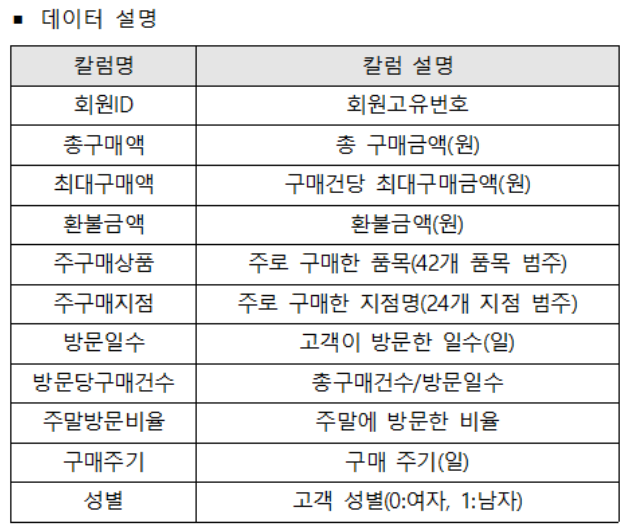

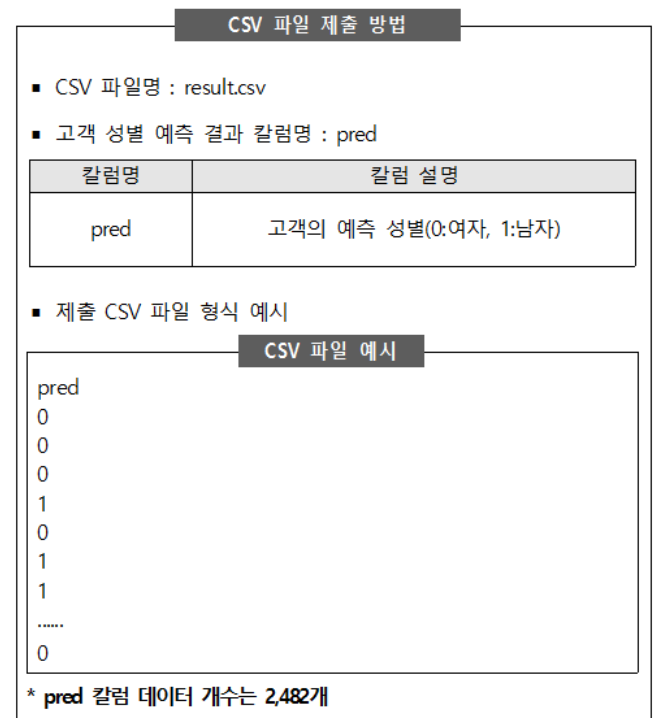

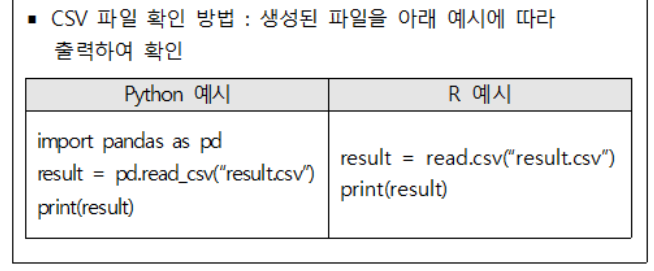

In [ ]:
#!git clone https://github.com/Soyoung-Yoon/bigdata

**2-02. 문제풀이**
- XY = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/customer_train.csv')
- X_submission = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/customer_test.csv')

In [ ]:
def get_scores(model, x_train, x_test, y_train, y_test):
    # 정확도(accuracy)
    y_pred1 = model.predict(x_train)
    y_pred2 = model.predict(x_test)
    A = accuracy_score(y_train, y_pred1)
    B = accuracy_score(y_test, y_pred2)
    #  roc_auc_score를 구할 때는 성공의 예측확률을 주는 것이 더 정확합니다.
    y_proba1 = model.predict_proba(x_train)[:, 1]
    y_proba2 = model.predict_proba(x_test)[:, 1]
    C = roc_auc_score(y_train, y_proba1)
    D = roc_auc_score(y_test, y_proba2)

    return f'acc: {A:.4f} {B:.4f} AUC: {C:.4f} {D:.4f}'

In [ ]:
#  여기에 코드를 작성하세요.
#  성능평가 함수는 위의 것으로 작업하시는 것을 추천드립니다.



### 작업3유형 - t검정, 카이제곱검정

**3-01.혈압 전/후 차이 검정**

주어진 데이터(data/blood_pressure.csv)에는 고혈압 환자 120명의 치료 전후의 혈압이 저장되어 있다. 해당 치료가 효과가 있는지 (즉, 치료 후의 혈압이 감소했는지) 쌍체표본 t-검정(paired t-test)를 통해 답하고자 한다.
가설은 아래와 같다


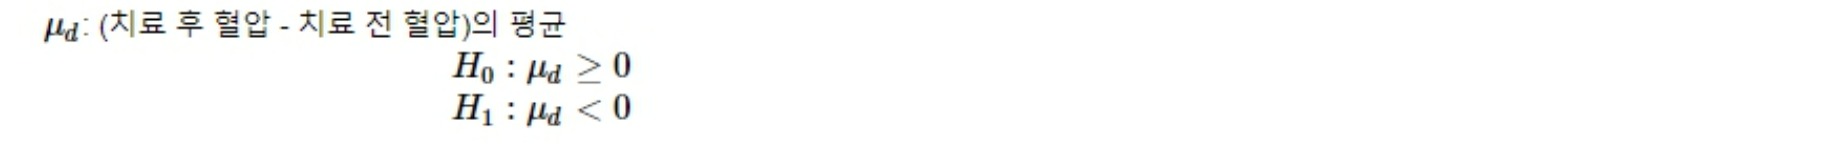

bp_before : 치료 전 혈압, bp_after : 치료 후 혈압

- (a) ud의 표본 평균을 구하시오 (반올림하여 소수 둘째자리까지 계산)
- (b) 위의 가설을 검정하기 위한 검정통계량을 입력하시오.(반올림하여 소수 넷째자리까지 계산)
- (c) 위의 통계량에 대한 p-값을 구하여 입력하시오. (반올림하여 소수 넷째자리까지 계산)
- (d) 유의수준 0.05 하에서 가설검정의 결과를 (채택/기각) 중 하나를 선택하여 입력하시오.

In [ ]:
# 예시문제 1)
import pandas as pd
from scipy.stats import ttest_rel, ttest_1samp

a = pd.read_csv("https://raw.githubusercontent.com/Soyoung-Yoon/data_02/main/blood_pressure.csv")
a.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [ ]:
# 풀이해 보세요


**3-02.타이타닉호 침몰 사건**

제공된 데이터(Titanic.csv)는 타이타닉호의 침몰 사건에서 생존한 승객 및 사망한 승객의 정보를 포함한 자료이다. 아래 데이터를 이용하여 생존여부(Survived)를 예측하고자 한다. 각 문항의 답을 [제출 형식]에 맞춰 답안 작성 페이지에 입력하시오.

제공 데이터
- PassengerId : 승객 번호
- Survivied: 생존여부 (1: 생존, 0: 사망)
- Pclass: 좌석 등급 (1등급, 2등급, 3등급)
- Name : 승객 이름
- Gender: 성별 ('male': 남성, 'female': 여성)
- Age: 연령
- Sibsp: 동반한 형제/자매 및 배우자 수
- Parch: 동반한 부모 및 자녀 수
- Ticket: 티켓번호
- Fare: 티켓의 요금(달러)
- Cabin: 객실 번호
- Embarked: 탑승지 위치(C: Cherbourg, Q: Queenstown, S: Southampton)

1) Gender와 Survived 변수 간의 독립성 검정을 실시하였을 때, 카이제곱 통계량은? (반올림하여 소수 셋째 자리까지 계산)

In [ ]:
# 예시문제 2-1)
import pandas as pd
from scipy.stats import chi2_contingency
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/titanic_dataq.csv')
print(df.head(5))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Gender   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


2) Gender, SibSp, Parch, Fare를 독립변수로 사용하여 로지스틱 회귀모형을 실시하였을 때, Parch 변수의 계수값은? (반올림하여 소수 셋째 자리까지 계산)

In [ ]:
# 예시문제 2-2)


3) 위 2번 문제에서 추정된 로지스틱 회귀모형에서 SibSp 변수가 한 단위 증가할 때 생존할 오즈비(Odds ratio) 값은? (반올림하여 셋째 자리까지 계산)

In [ ]:
# 예시문제 2-3)


## 2회 기출 복원

### 작업1유형

**1-1. 보스턴 데이터**

보스턴 데이터 범죄율 컬럼('CRIM')의 top10 중 10번째 범죄율 값으로 1~10위의 범죄율 값을 변경 후, 'AGE' 변수의 값이 80이상인 것에 대한 범죄율 평균을 산출하라.

In [ ]:
## sklearn에서 더이상 boston 데이터를 제공하지 않으므로 교체합니다.
##from sklearn.datasets import load_boston
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/boston.csv')
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [ ]:
# 2-1-1)


In [ ]:
# DataFrame.sort_values 사용


**1-2. 하우징 데이터**
- 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/housing.csv' 파일을 사용한다
- 주어진 데이터의 첫번째 행 부터 순서대로 80% 까지의 데이터를 추출 후
- 'total_bedrooms' 변수의 결측값(NA)을 'total_bedrooms' 변수의 중앙값으로 대체하고,
- 대체 전의 'total_bedrooms' 변수 표준편차값과 대체 후의 'total_bedrooms' 변수 표준편차 값을 산출하여
- 대체 전 표준편차 값 - 대체 후 표준편차 값을 구해 출력한다.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/housing.csv')
print(df.shape) # 20640
print(df.head(2))

(20640, 10)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  


In [ ]:
# 2-1-2)
# 첫번째 행 부터 순서대로 80% 까지의 데이터를 추출
p = int(df.shape[0]* 0.8)  # 소수점 아래를 버림
p = round(df.shape[0]* 0.8)
A = df.iloc[:p, :]
# 'total_bedrooms' 변수의 결측값(NA)을 'total_bedrooms' 변수의 중앙값으로 대체
A_before = A['total_bedrooms']
A_after = A_before.fillna(A_before.median())
# 대체 전의 'total_bedrooms' 변수 표준편차값과 대체 후의 'total_bedrooms' 변수 표준편차 값을 산출
# 대체 전 표준편차 값 - 대체 후 표준편차 값
result1 = A_before.std(ddof=0) - A_after.std(ddof=0)
result2 = A_before.std(ddof=1) - A_after.std(ddof=1)
print(round(result1, 2), round(result2, 2))
print(round(result1), round(result2)) # 반올림해서 정수로 변환

1.97 1.98
2 2


In [ ]:
# sklearn - train_test_split
from sklearn.model_selection import train_test_split

A, _ = train_test_split(df, train_size=0.8, shuffle=False)
A_before = A['total_bedrooms']
A_after = A_before.fillna(A_before.median())
result = A_before.std(ddof=0) - A_after.std(ddof=0)
print(round(result, 4))

1.975


**1-3. 하우징 데이터**
- 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/housing.csv' 파일을 사용한다
- 하우징 데이터에서 'latitude' 컬럼의 이상치를 찾아 이상치들의 합을 산출하시오.
- 이상치 기준 : 평균 - (표준편차 * 1.5), 평균 + (표준편차 * 1.5)

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/housing.csv')
print(df.shape)
print(df.head(2))

(20640, 10)
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  


In [ ]:
# 평균 - (표준편차 * 1.5), 평균 + (표준편차 * 1.5)
# 2-1-3)


### 작업2유형 - 2진분류, roc_auc


**2-01. 문제이해**

고객 구매 데이터를 사용해서 고객이 주문한 물품이 제 시간에 도착여부(Reached.on.Time_Y.N) 예측
- ontime_train.csv : 학습 및 학습평가에 사용하는 파일
- ontime_test.csv : 제출용 데이터 생성에 사용하는 파일
- roc_auc_score를 사용하여 평가
- 아래의 형식으로 result.csv 로 저장
- Reached.on.Time_Y.N은 제 시간도착 여부
- https://www.kaggle.com/prachi13/customer-analytics?select=Train.csv
        pred
        0
        0
        0
        1

In [ ]:
# 기출에서 기억나는 것
# - 컬럼 중 1개가 숫자형으로 안내 되었는데 info() 결과 object로 표시됨
# - head() 로 해서 표시되지 않았음
# - value가 '1', '*7', '4', '9', '*7' 이렇게 되어 있어서 '*'을 제거하고 dtype을 변경해야함

In [ ]:
import pandas as pd
# 이상한 것 확인
df = pd.DataFrame({'rating': ['1', '2', '4', '*7', '8', '*7', '3', '5', '2', '*4']})
df['rating'] = df['rating'].str.replace('*', '').astype('int64')
df['rating']
#df['rating'].astype('int')   # ValueError: invalid literal for int() with base 10: '*7'

**2-02. 문제풀이**
- XY = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/ontime_train.csv')
- X_submission = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/ontime_test.csv')


In [ ]:
def get_scores(model, x_train, x_test, y_train, y_test):
    # 정확도(accuracy)
    y_pred1 = model.predict(x_train)
    y_pred2 = model.predict(x_test)
    A = accuracy_score(y_train, y_pred1)
    B = accuracy_score(y_test, y_pred2)
    #  roc_auc_score를 구할 때는 성공의 예측확률을 주는 것이 더 정확합니다.
    y_proba1 = model.predict_proba(x_train)[:, 1]
    y_proba2 = model.predict_proba(x_test)[:, 1]
    C = roc_auc_score(y_train, y_proba1)
    D = roc_auc_score(y_test, y_proba2)

    return f'acc: {A:.4f} {B:.4f} AUC: {C:.4f} {D:.4f}'

In [ ]:
#  여기에 작업하세요 ^_^
# get_scores는  위의 함수와 같이 y_proba1,  y_proba2를 사용하시는 것이 정확합니다.



In [ ]:
# [답지를 가지고 채점해 봅시다]
sol = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/ontime_result.csv')
sol['Reached.on.Time_Y.N'].value_counts(normalize=True)

# 0.68   (model4)
# 0.6889 (model3)
# 0.7284 (model2)
roc_auc_score(sol['Reached.on.Time_Y.N'].to_numpy(), temp['pred'].to_numpy())

0.7284024144869214

## 3회 기출 복원

### 작업1유형

**1-1.캘리포니어 집값 데이터**

결측치를 포함하는 모든 행을 제거한 후, 처음부터 순서대로 70%를 추출하여, 'housing_median_age' 컬럼의 사분위수 Q1의 값을 구하시오
- 주의사항 정답 제출시, 정수형으로 제출해야 함
- "https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/housing03.csv" 파일 사용

In [ ]:
# 한 문자형 컬럼에 빈칸 ''인 데이터 1건이 있어서
# 빈칸을 결측으로 처리시 빈칸 제거전 242건에서 빈칸 제거후 243건의 행이 제거됨
# 하지만 제거하지 않고 1분위수를 구하더라도 정답은 같음

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/housing03.csv")
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [ ]:
# 3-1-1)


**1-2.연도별 나라별 유병률 데이터**

2000년 데이터에 대해 국가 전체 유병률 평균 값보다 큰 값을 가진 국가 개수는?
(year 변수와 국가들의 결핵 유병률 값을 가진 데이터셋이 주어짐)

        year  Afghanistan  Albania  Algeria  Andorra  Angola  Antigua & Barbuda  \
        0  1999            0     89.0     25.0    245.0   217.0              102.0
        1  2000            0    132.0      0.0    138.0    57.0              128.0
        2  2001            0     54.0     14.0    312.0    45.0               45.0
        3  2002            0      4.9      0.7     12.4     5.9                4.9

- 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/worlddata.csv' 파일 사용

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/worlddata.csv")
df

,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua & Barbuda,Argentina,Armenia,Australia,...,Tanzania,USA,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1999,0,89.0,25.0,245.0,217.0,102.0,193.0,21.0,261.0,...,36.0,249.0,115.0,25.0,21.0,333.0,111,6.0,32.0,64.0
1,2000,0,132.0,0.0,138.0,57.0,128.0,25.0,179.0,72.0,...,6.0,158.0,35.0,101.0,18.0,100.0,2,0.0,19.0,18.0
2,2001,0,54.0,14.0,312.0,45.0,45.0,221.0,11.0,212.0,...,1.0,84.0,220.0,8.0,11.0,3.0,1,0.0,4.0,4.0
3,2002,0,4.9,0.7,12.4,5.9,4.9,8.3,3.8,10.4,...,5.7,8.7,6.6,2.4,0.9,7.7,2,0.1,2.5,4.7


In [ ]:
# 3-1-2)


**1-3.타이타닉 데이터**
- 각 열의 결측치 비율을 확인 한 후, 결측치의 비율이 가장 높은 변수명을 구하시오
- "https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/titanic_train03.csv" 파일 사용
- 원본 데이터 : https://www.kaggle.com/c/2019-1st-ml-month-with-kakr/overview

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/titanic_train03.csv")
df

In [ ]:
# 3-1-3)


### 작업2유형 - 2진분류, roc_auc


**2-01. 문제이해**

여행자 보험 데이터 - 보험가입여부 예측
- 여행자 보험 데이터를 활용해서 보험가입여부를 예측하라.
- insurance_train.csv : 학습 및 학습평가에 사용하는 파일
- insurance_test.csv : 제출용 데이터 생성에 사용하는 파일
- roc_auc_score를 사용하여 평가
- 아래의 형식으로 result.csv 로 저장
- TravelInsurance: 보험가입여부
- 원본 데이터 : https://www.kaggle.com/agileteam/traval-insurance-exam
        pred
        1
        0
        0
        1

**2-02. 문제풀이**
- XY = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/insurance_train.csv')
- X_submission = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/insurance_test.csv')


In [ ]:
def get_scores(model, x_train, x_test, y_train, y_test):
    # 정확도(accuracy)
    y_pred1 = model.predict(x_train)
    y_pred2 = model.predict(x_test)
    A = accuracy_score(y_train, y_pred1)
    B = accuracy_score(y_test, y_pred2)
    #  roc_auc_score를 구할 때는 성공의 예측확률을 주는 것이 더 정확합니다.
    y_proba1 = model.predict_proba(x_train)[:, 1]
    y_proba2 = model.predict_proba(x_test)[:, 1]
    C = roc_auc_score(y_train, y_proba1)
    D = roc_auc_score(y_test, y_proba2)

    return f'acc: {A:.4f} {B:.4f} AUC: {C:.4f} {D:.4f}'

In [ ]:
#  여기에 작업하세요 ^_^
# get_scores는  위의 함수와 같이 y_proba1,  y_proba2를 사용하시는 것이 정확합니다.



## 4회 기출 복원

### 작업1유형

**1-1. 신상 데이터**
age 컬럼에 대해 아래의 과정을 수행하고 (다) 단계의 결과값을 출력하여라.
- (가) 제 1사분위수와 제 3사분위수를 구하기
- (나) 두 값의 차이 절댓값 구하기
- (다) 그 값의 소수점 버리기
- 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/basic1_data04.csv' 파일 사용

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/basic1_data04.csv')
print(df.head(2))

     id  age city    f1  f2   f3    f4         f5
0  id01  2.0   서울   NaN   0  NaN  ENFJ  91.297791
1  id02  9.0   서울  70.0   1  NaN  ENFJ  60.339826


In [ ]:
# 4-1-1)


**1-2. Facebook 데이터**

Facebook 데이터셋을 불러와 (loves반응 + wows반응)/(reactions반응) 비율이 0.4보다 크고 0.5보다 작으면서, type이 'video'인 데이터의 갯수를 구하여라
- 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/fb_data04.csv' 파일 사용

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/fb_data04.csv")
print(df.head(2))

In [ ]:
# 4-1-2)


**1-3. 넷플릭스 데이터**
netflix_subset 데이터셋에서 date_added가 2018년 1월이면서 country가 United Kingdom 단독 제작인 데이터의 개수를 구하여라
- 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/nf_data04.csv' 파일 사용

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/nf_data04.csv")
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [ ]:
# 4-1-3)



### 작업2유형 - 다항분류, f1-score(macro)

**2-01. 문제이해**

자동차 시장 세분화
- 자동차 회사는 새로운 전략을 수립하기 위해 4개의 시장으로 세분화했습니다.
- 기존 고객 분류 자료를 바탕으로 신규 고객이 어떤 분류에 속할지 예측해주세요!
- market_train.csv : 학습 및 학습평가에 사용하는 파일
- market_test.csv : 제출용 데이터 생성에 사용하는 파일
- 예측할 값(y): "Segmentation" (1,2,3,4)
- 평가: Macro f1-score
- 아래의 형식으로 result.csv 로 저장
- 제출형식
        pred
        1
        2
        3
        4

**2-02. 문제풀이**
- XY = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/market_train.csv')
- X_submission = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/market_test.csv')

**2-03. 문제풀이(XGBClassifier)**

In [ ]:
# [0] import
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)
pd.set_option('display.float_format', '{:.4f}'.format)


def get_scores(model, x_train, x_test, y_train, y_test):
    y_pred1 = model.predict(x_train)
    y_pred2 = model.predict(x_test)
    A = accuracy_score(y_train, y_pred1)
    B = accuracy_score(y_test, y_pred2)
    # [None, 'micro', 'macro', 'weighted']
    C = f1_score(y_train, y_pred1, average='macro')
    D = f1_score(y_test, y_pred2, average='macro')
    return f'acc: {A:.4f} {B:.4f}, f1: {C:.4f} {D:.4f}'


# [1] 파일 가져오기 (2개, XX_train.csv, XX_test.csv)
XY = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/market_train.csv')
X_submission = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/market_test.csv')

X = XY.drop(columns=['Segmentation'])
Y = XY['Segmentation']

#print(Y.value_counts())  # [1, 2, 3, 4], 비슷한 분포
#print(X.shape, Y.shape, X_submission.shape)  # (6665, 10) (6665,) (2154, 10)

# [2] 데이터 탐색 (XY.info(), X_submission.info()) 결측치, 컬럼 dtype
# [3] 데이터 전처리
# [3-1] X, X_submission -> X_all
# [3-2] X_all : 컬럼제거, 컬럼 dtype 변경(컬럼의 값을 대체), Encoding(범주형->수치형)
# [3-3] X_all : Scaling (안함, MinMaxScaler, StandardScaler, ...)
# [3-4] X_all -> X, X_submission 분리

X_all = pd.concat([X, X_submission], axis=0)
X_all = X_all.drop(columns=['ID'])
for colname in ['Gender', 'Ever_Married', 'Graduated']:
    X_all[colname] = LabelEncoder().fit_transform(X_all[colname])

X_all = pd.get_dummies(X_all)

if True:
    temp = StandardScaler().fit_transform(X_all)
    X_all = pd.DataFrame(temp, columns=X_all.columns)

X = X_all.iloc[:len(X), :]
X_submission = X_all.iloc[len(X):, :]
print(X.shape, X_submission.shape)  # (6665, 25) (2154, 25)
# [4] 모델링
# [4-1] train_test_split : (X, Y) -> (x_train, x_test, y_train, y_test)
# [4-2] 모델객체 생성, 학습 (x_train, y_train)
# [4-3] 평가 (x_train, y_train), (x_test, y_test)

temp = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1234)
x_train, x_test, y_train, y_test = temp

# Expected: [0 1 2 3], got [1 2 3 4]
model5 = XGBClassifier(random_state=0).fit(x_train, y_train)
print(get_scores(model5, x_train, x_test, y_train, y_test))

# [5] 최종모델 선택, 예측값(X_submission), 제출파일생성
fmodel = model5
y_pred = fmodel.predict(X_submission)
pd.DataFrame({'pred': y_pred}).to_csv('result.csv', index=False)

# [6] 제출한 파일 확인
temp = pd.read_csv('result.csv')
print(temp.shape)  # (2154, 1)
#print(temp.head(10))
#print(Y.value_counts(normalize=True))
print(temp['pred'].value_counts(normalize=True))

## 5회 기출 복원

### 작업1유형
- 출처 : 데이터마님
- https://www.datamanim.com/dataset/practice/ex5.html

**1-1. 종량제 봉투 가격**

20L가격과 5L가격이 모두 0원이 아닌 데이터만 필터를 한 후, 각 row별로 20L가격과 5L가격의 차이를 ‘차이가격’ 이라 부른다고 하자. 시도명 별 차이가격의 평균가격을 비교할때 그 값이 가장 큰 금액을 반올림하여 정수로 답하라.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/waste_bags.csv')
df.head(2)

,시도명,시군구명,종량제봉투종류,종량제봉투용도,1L가격,2L가격,5L가격,10L가격,20L가격,30L가격
0,경기도,안양시,규격봉투,생활쓰레기,0,0,150,300,550,0
1,경기도,안양시,규격봉투,생활쓰레기,0,0,150,300,550,0


In [ ]:
# 5-1-1)


**1-2. 성인 체중 및 키 데이터**

BMI는 몸무게(kg) / (키(M) * 키(M)) 로 정의 된다. 초고도 비만은 BMI 25이상 , 고도 비만은 BMI 25미만 - 23이상 , 정상은 23미만 - 18.5이상 저체중은 18.5미만으로 정의 된다. 주어진 데이터에서 초고도비만 인원 + 저체중 인원 의 숫자는?

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/height_weight.csv')
df.head(2)

,ID,height(cm),weight(kg)
0,0,171.2,63.1
1,1,171.1,68.5


In [ ]:
# 5-1-2) 단위 조심


**1-3. 년도별 서울 각 구의 초,중,고 전출 전입 인원**

순유입인원은 초중고 도내,도외 전입인원에서 초중고 도내, 도외 전출인원을 뺀값이다. 각년도별로 가장 큰 순유입인원을 가진 지역구의 순유입인원을 구하고 전체 기간의 해당 순유입인원들의 합을 구하여라

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e5_p1_3.csv')
df.head(2)

,지역,초등학교_전출_도내,초등학교_전출_도외,초등학교_전입_도내,초등학교_전입_도외,중학교_전출_도내,중학교_전출_도외,중학교_전입_도내,중학교_전입_도외,고등학교_전출_도내,고등학교_전출_도외,고등학교_전입_도내,고등학교_전입_도외,년도
0,종로구,221,132,255,126,63,71,104,73,203,72,166,75,2012
1,중구,295,139,203,100,66,43,58,44,156,37,104,39,2012


In [ ]:
# 5-1-3)


### 작업2유형 - 회귀, rmse

**2-01. 문제이해**
- 벤츠 차량 가격 예측 : https://www.kaggle.com/datasets/mysarahmadbhat/mercedes-used-car-listing
- carprice_train.csv : 학습 및 학습평가에 사용하는 파일
- carprice_test.csv : 제출용 데이터 생성에 사용하는 파일
- 예측할 값(y): price (연속형 데이터)
- 평가: rmse
- 아래의 형식으로 **result.csv** 로 저장
- 제출형식
        pred
        3756.9578
        63325.4373
        17166.1540
        15094.1601
        17072.5395


**2-02. 문제풀이**
- XY = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/carprice_train.csv')
-X_submission = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/carprice_test.csv')

**[참조] get_dummies**

train, test의 범주형 독립변수의 범주가 서로 다른 경우 처리방법
- 1) train + test
- 2) test.reindex()

In [ ]:
# 시험 : train - 학습/학습평가, test - 제출용
# 실제 사용 : train - 과거~현재 데이터, test - 미래 데이터
# train (전처리, 특성파악 기준), test (적용)
# train - fit, transform,   test - transfrom

In [ ]:
# [문제 상황]
import pandas as pd

X = pd.DataFrame({'A': ['a', 'b', 'c'], 'B': [1, 2, 3], 'ID':[1, 2, 3]})
X_submission = pd.DataFrame({'A': ['a', 'b', 'd'], 'B': [1, 3, 4], 'ID':[4, 5, 6]})

X = pd.get_dummies(X, columns=['A', 'B'])
X_submission = pd.get_dummies(X_submission, columns=['A', 'B'])
print(X)
print(X_submission)

In [ ]:
# [해결방법1]
import pandas as pd

X = pd.DataFrame({'A': ['a', 'b', 'c'], 'B': [1, 2, 3], 'ID':[1, 2, 3]})
X_submission = pd.DataFrame({'A': ['a', 'b', 'd'], 'B': [1, 3, 4], 'ID':[4, 5, 6]})

# 결합, 더미변수 생성, 분할

print(X)
print(X_submission)

In [ ]:
# [해결방법2]
import pandas as pd

X = pd.DataFrame({'A': ['a', 'b', 'c'], 'B': [1, 2, 3], 'ID':[1, 2, 3]})
X_submission = pd.DataFrame({'A': ['a', 'b', 'd'], 'B': [1, 3, 4], 'ID':[4, 5, 6]})

# X에서 더미변수 생성, X_submission에 동일 범주 적용

print(X)
print(X_submission)

In [ ]:
# [LabelEncoder - 문제상황]
import pandas as pd
from sklearn.preprocessing import LabelEncoder

X = pd.DataFrame({'A': ['a', 'b', 'c'], 'B': [1, 2, 3], 'ID':[1, 2, 3]})
X_submission = pd.DataFrame({'A': ['a', 'b', 'd'], 'B': [1, 3, 4], 'ID':[4, 5, 6]})

# X.fit_transform, X_submission.transform
encoderA = LabelEncoder()
X['A'] = encoderA.fit_transform(X['A'])
X_submission['A'] = encoderA.transform(X_submission['A'])  # unseen labels: 'd'
print(X)
print(X_submission)

In [ ]:
# [LabelEncoder - 해결방법2]
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

X = pd.DataFrame({'A': ['a', 'b', 'c'], 'B': [1, 2, 3], 'ID':[1, 2, 3]})
X_submission = pd.DataFrame({'A': ['a', 'b', 'd'], 'B': [1, 3, 4], 'ID':[4, 5, 6]})

# X.fit_transform, X_submission.transform



print(X)
print(X_submission)

## 6회 기출 복원

### 작업1유형

**1-1. 소방서 데이터**

소방서별 [출동시간 - 신고시간]의 평균을 구해, 가장 큰 값을 찾고 그 값을 반올림하여 분 단위로 도출하시오.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/big_6_1_1.csv')
df.head()

,소방서명,신고시간,출동시간
0,서부,2022-01-01 0:00,2022-01-01 0:01
1,동부,2022-01-01 1:25,2022-01-01 1:27
2,중부,2022-01-01 2:50,2022-01-01 2:51
3,북부,2022-01-01 4:15,2022-01-01 4:16
4,남부,2022-01-01 5:40,2022-01-01 5:43


In [ ]:
# 6-1-1)


**1-2. 초등학교 학생, 교사 수 데이터**

초등학교의 학년별 학생 수와 교사수 정보를 사용하여,  교사 한명당 맡은 학생수가 가장 많은 학교를 찾고, 그 학교의 전체 교사 수를 구하시오.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/big_6_1_2.csv')
df.head()

,학교명,학년,학생수,교사수
0,가경초등학교,1,54,2
1,가경초등학교,2,68,4
2,가경초등학교,3,38,2
3,가경초등학교,4,61,4
4,가경초등학교,5,61,3


In [ ]:
# 6-1-2)


**1-3. 범죄 발생 수 데이터**

연도별로 총 범죄 건수(범죄유형별 발생 건수의 합)의 월평균 값을 구한 후, 그 값이 가장 큰 연도를 찾아, 해당 연도의 총 범죄 건수의 월평균 값을 반올림하여 정수로 출력하세요!

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/big_6_1_3.csv')
df.head()

,월별,강력범죄,교통범죄,사이버범죄,지능범죄,마약범죄,경범죄
0,2003-01,1098,248,1109,918,728,860
1,2003-02,973,157,142,762,521,1215
2,2003-03,1291,370,927,481,920,265
3,2003-04,681,411,575,593,1252,1014
4,2003-05,766,1123,154,1044,332,842


In [ ]:
# 6-1-3)


### 작업2유형 - 다항분류, macro f1-score

**2-01.문제이해**
- 건강 상태 분류문제 : https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset
- health_train.csv : 학습 및 학습평가에 사용하는 파일
- health_test.csv : 제출용 데이터 생성에 사용하는 파일
- 예측할 값(y): General_Health
- 주의사항 : 예측값이 0, 1, 2 아님 ('Excellent', 'Good', 'Fair')
- 평가: f1_score (macro)
- 아래의 형식으로 result.csv 로 저장
- 제출형식
        pred
        Good
        Fair
        Good
        Excellent

**2-02.문제풀이**
- XY = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/health_train.csv')
- X_submission = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/health_test.csv')

**2-03.문제풀이(XGBClassifier)**

In [ ]:
# [0] import
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

#pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)
pd.set_option('display.float_format', '{:.4f}'.format)

def get_scores(model, x_train, x_test, y_train, y_test):
    y_pred1 = model.predict(x_train)
    y_pred2 = model.predict(x_test)
    A = accuracy_score(y_train, y_pred1)
    B = accuracy_score(y_test, y_pred2)
    # [None, 'micro', 'macro', 'weighted']
    C = f1_score(y_train, y_pred1, average='macro')
    D = f1_score(y_test, y_pred2, average='macro')
    return f'acc: {A:.4f} {B:.4f}, f1: {C:.4f} {D:.4f}'


# [1] 파일 가져오기 (2개, XX_train.csv, XX_test.csv)
XY = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/health_train.csv')
X_submission = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/health_test.csv')
#print(XY.head(2))
#print(X_submission.head(2))

X = XY.drop(columns=['General_Health'])
Y = XY['General_Health']

#print(Y.value_counts(normalize=True))  # ['Good', 'Excellent', 'Fair], 비슷한 분포
#print(X.shape, Y.shape, X_submission.shape)  # (8977, 19) (8977,) (3848, 19)

# [2] 데이터 탐색 (XY.info(), X_submission.info()) 결측치, 컬럼 dtype
label_cat = ['Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer',
           'Depression', 'Arthritis', 'Sex', 'Smoking_History', 'Age_Category']

# [3] 데이터 전처리
# [3-1] X, X_submission -> X_all
# [3-2] X_all : 컬럼제거, 컬럼 dtype 변경(컬럼의 값을 대체), Encoding(범주형->수치형)
# [3-3] X_all : Scaling (안함, MinMaxScaler, StandardScaler, ...)
# [3-4] X_all -> X, X_submission 분리

# 칼럼 제거 : 'ID'
# Label Encoding : label_cat
# OneHot Encoding : 'Checkup', 'Diabetes', 'Age_Category'

X_all = pd.concat([X, X_submission], axis=0)
X_all = X_all.drop(columns=['ID'])
for colname in label_cat:
    X_all[colname] = LabelEncoder().fit_transform(X_all[colname])

X_all = pd.get_dummies(X_all)

#X_all.info()
if False:
    temp = StandardScaler().fit_transform(X_all)
    X_all = pd.DataFrame(temp, columns=X_all.columns)

X = X_all.iloc[:len(X), :]
X_submission = X_all.iloc[len(X):, :]
#print(X.shape, X_submission.shape)  # (8977, 25) (3848, 25)

# [4] 모델링
# [4-1] train_test_split : (X, Y) -> (x_train, x_test, y_train, y_test)
# [4-2] 모델객체 생성, 학습 (x_train, y_train)
# [4-3] 평가 (x_train, y_train), (x_test, y_test)

temp = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=1234)
x_train, x_test, y_train, y_test = temp

#Expected: [0 1 2], got ['Excellent' 'Fair' 'Good']
model5 = XGBClassifier(random_state=0).fit(x_train, y_train)
print(get_scores(model5, x_train, x_test, y_train, y_test))

# [5] 최종모델 선택, 예측값(X_submission), 제출파일생성
fmodel = model5
y_pred = fmodel.predict(X_submission)
pd.DataFrame({'pred': y_pred}).to_csv('result.csv', index=False)

# [6] 제출한 파일 확인
temp = pd.read_csv('result.csv')
print(temp.shape)  # (3848, 1)
#print(temp.head(10))
#print(Y.value_counts(normalize=True))
#print(temp['pred'].value_counts(normalize=True))

### 작업3유형 - 카이제곱검정, 다중선형회귀

**3-1.흡연**
- A 도시의 남성 600명과 여성 550명이 있다. 남성들 중 흡연자 비율은 0.2이며 여성들 중 흡연자 비율은 0.26이다.
- 남성과 여성 간에 흡연 여부에 따른 비율이 다른지 확인하고 싶다.
- 유의 수준 0.05에서 귀무가설에 대해 기각 / 채택 여부와 p-value값을 각각 출력하라 (반올림하여 소숫점아래 3자리까지 출력)


In [ ]:
from scipy.stats import chisquare  # 적합도 (범주형변수1개)
from scipy.stats import chi2_contingency # 동질성, 독립성 (범주형변수2개)

In [ ]:
# 6-3-1 (1)


- 데이터가 파일로 주어진다면 직접 교차표를 만들어 사용하도록 한다.
- https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/gender_smoke_data.csv

In [ ]:
# 6-3-1 (2)
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/gender_smoke_data.csv')
print(df.head())


  Gender Smoke
0   Male    No
1   Male   Yes
2   Male    No
3   Male   Yes
4   Male    No


**3-2.콜레스테롤**
- 연령과 몸무게, 콜레스테롤 수치 데이터를 사용해 다음을 답하여라.
- 연령 몸무게 콜레스테롤 수치 데이터 데이터 출처 : https://www.kaggle.com/datasets/hangawqadir/erbil-heart-disease-dataset
- 1) age와 cholesterol을 가지고 weight를 예측하는 선형 회귀 모델을 만들려고한다. age의 회귀 계수를 구하여라
- 2) age가 고정일 때 cholesterol와 weight가 선형관계에 있다는 가설을 유의수준 0.05하에 검정하라
- 3) age가 55, cholesterol가 72.6일때 위 모델을 기반으로 weight값을 예측하라.

- 선형회귀의 귀무가설 : 회귀 모델의 기울기가 0이다
즉, 독립 변수와 종속 변수는 선형관계가 아니다.
- 선형회귀의 대립가설 : 회귀 모델의 기울기가 0이 아니다.
즉, 독립 변수와 종속 변수는 선형관계에 있다.

In [ ]:
# 6-3-2
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/cholesterol.csv')
print(df.head(2))


   age  cholesterol  weight
0   65         73.0   111.0
1   54        119.0    81.0


## 7회 기출 복원

### 작업1유형

**1-1.결측치, 표준화, 최댓값**

- 'student_scores.csv'를 사용하여 score에서 발생한 결측치를 제거하고, 가장 많은 학생들이 들었던 수업 과목에서 해당 과목의 점수를 표준화하여 가장 높은 점수를 구하여 출력합니다. (반올림하여 소수점아래 3자리까지 출력)



In [ ]:
# 7-1-1) - 영상에서 사용했던 코드
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/student_scores.csv')
print(df.head(2))


   subject  score
0  history   46.0
1  science   52.0


**1-2.상관계수, 최댓값, 평균값**

- 'close_features.csv' 파일에는 77개의 독립변수와 1개의 종속변수가 있다. (종속변수: CLOSE)
- CLOSE 변수와의 **상관관계가** 가장 큰 독립변수의 평균값을 구하여라. (반올림하여 소수점아래 3자리까지 출력)
- **영상에서는 '상관계수가'라고 했는데,  "상관관계가'로 수정합니다!**

In [ ]:
# 7-1-2)
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/close_features.csv')
print(df.head(2))


**1-3.이상치 개수**
- 'outlier_data.csv'의 'feature_2' 칼럼 내의 이상치 개수를 구하여라.
- ```이상치 < 평균 - IQR * 1.5, 이상치 > 평균 + IQR * 1.5```



In [ ]:
# 7-1-3)
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/outlier_data.csv')
print(df.head(2))


### 작업2유형 - 회귀, rmse
- 데이터 출처 : https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data


**2-01. 문제이해**

아웃렛의 amount 예측하기
- outlet_train.csv : 학습 및 학습평가에 사용하는 파일
- outlet_test.csv : 제출용 데이터 생성에 사용하는 파일
- 예측할 값(y): amount
- 평가: RMSE
- 범주형 변수가 여러 개 있었으며, 범주 중에 범주의 가짓수가 42개 되는 것이 있었음
- 파라미터 튜닝하면 오히려 점수가 낮음(rmse값이 무지 컸음 거의 5천만..)
- 아래의 형식으로 result.csv 로 저장
- 제출형식
        pred
        3865.718799
        4335.691752
        3140.762272
        1411.627756
        1866.883742




**2-02. 문제풀이**
- XY = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/outlet_train.csv')
- X_submission = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/outlet_test.csv')


###작업3유형 - 로지스틱회귀, 다중선형회귀

**3-1-1. 로지스틱 회귀 - Logit 사용**
- 데이터셋을 210번까지는 학습용 211 - 300번까지는 평가용으로 나누어 사용하도록 한다.
- 'gender'를 종속변수, age, diameter, height, weight를 독립변수를 하는 로지스틱회귀 모형을 만든다.  
- 1) 'weight'를 설명변수로 하였을 때 오즈비는?
- 2) 잔차이탈도(residual deviance) 구하기
- 3) 평가용으로 모형예측한 결과와 실제값의 오차율

참고

잔차이탈도(Residual Deviance)는 통계학에서 회귀 분석의 적합도를 평가하는데 사용되는 척도로 주로 로지스틱 회귀(Logistic Regression) 및 포아송 회귀(Poisson Regression)와 같은 일반화 선형 모델(Generalized Linear Models, GLMs)에서 사용된다.
- llf: "최종 모델"의 로그 가능도(Log-Likelihood)를 나타냅니다. 여기서 최종 모델은 실제로 데이터에 적합한 회귀 모델을 의미합니다.
- 잔차 이탈도(Residual Deviance) = - 2 * llf
- AIC(Akaike Information criterion) = -2 * llf + 2 * k  (k = 모델의 파라미터 수)
- model.aic 있음


In [ ]:
# 7-3-1 (1) (오즈비 계산, Residual Deviance 구하기,Error Rate)
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/gender_classification.csv')
print(df.head(5))


In [ ]:
import pandas as pd
#s = pd.Series([0, 0, 1, 1, 0])
s = pd.Series([False, False, True, True, False])
#    1의 개수  1의 비율
print(s.sum(), s.mean())  # 전체합/개수

2 0.4


In [ ]:
# [참고] AIC 구하기
print(round(model_logit.aic, 3))

67.294


**3-1-2. 로지스틱 회귀 - GLM 사용(추천)**
- 데이터셋을 210번까지는 학습용 211 - 300번까지는 평가용으로 나누어 사용하도록 한다.
- 'gender'를 종속변수, age, diameter, height, weight를 독립변수를 하는 로지스틱회귀 모형을 만든다.  
- 1) 'weight'를 설명변수로 하였을 때 오즈비는?
- 2) 잔차이탈도(residual deviance) 구하기
- 3) 평가용으로 모형예측한 결과와 실제값의 오차율

In [ ]:
# 7-3-1 (2) (오즈비 계산, Residual Deviance 구하기,Error Rate)
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/gender_classification.csv')
print(df.head())


In [ ]:
# [참고] AIC 구하기
print(round(model_glm.aic, 3))

67.294


**3-2. 다중선형회귀모형**

- 'target'의 값을 예측하는 모형을 만든다.(독립변수가 많았음)
- 1) 가장 높은 회귀계수를 구하시오.
- 2) 위 문제에서 적합된 모형 결정계수를 구하시오.
- 3) 가장 높은 p-value를 구하시오.
- 실제 시험에서는 회귀계수, 결정계수, p-value가 각각 0.901, 0.985, 0.052 였다고 합니다 ^^*!
- 예시는 동일한 예제를 구할 수 없어 가상으로 만든 것입니다.


In [ ]:
import pandas as pd
from statsmodels.api import OLS, add_constant
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/mlr_noisy.csv')
print(df.columns)


참고
- 변수가 많은 경우 formula 만들기

In [ ]:
import pandas as pd
from statsmodels.api import OLS
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/mlr_noisy.csv')
print(df.columns)


In [ ]:
import pandas as pd
XY = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/health_train.csv')
X_submission = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/health_test.csv')


##8회 기출 복원

### 작업1유형

**1-1.맥주 소비량 구하기**
'drinks.csv'를 사용하여 다음의 결과를 구하시오.
- 1) 대륙별 맥주의 평균 소비량이 가장 많은 곳을 구하시오.
-2) 1번에서 구한 대륙에서 다섯번째로 맥주 소비량이 많은 국가를 구하시오.
-3) 2번에서 구한 국가의 맥주 소비량을 정수로 작성하시오.


In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/drinks_09011.csv')
print(df.head(3))

            국가  맥주  증류주  와인   기타      대륙
0  Afghanistan   0    0   0  0.0    Asia
1      Albania  89  132  54  4.9  Europe
2      Algeria  25    0  14  0.7  Africa


In [ ]:
# 8-1-1)


**1-2. 관광객**
'tourist_09012.csv' 파일을 사용하여 다음의 결과를 구하시오.
- 관광객비율 = 관광 / (관광 + 공무)
- 1) 관광객 비율이 두번째로 높은 나라의 '관광'수를 a라고 정의하시오.
- 2) 관광객 수가 두 번째로 높은 나라의 '공무'수를 b라고 정의하시오.
- 3) a + b의 값을 구하시오.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/tourist_08012.csv')
print(df.head(3))

   국적    관광     사업    공무     기타
0  미주  3375  205.0  1495  14423
1  일본  3300  336.0   165    566
2  미국  3127  159.0  1447  10722


In [ ]:
# 8-1-2)


**1-3.스케일링**
'environment_09013.csv' 파일을 사용하여, 다음의 결과를 구하시오.
- 1) co컬럼과 nmch컬럼을 사용하여 Min-Max Scale을 시행하시오.
  - Min-Max Scale = (Xn - Xmin) / (Xmax - Xmin)
- 2) Min-Max Scale이 적용된 각 칼럼의 표준편차를 구하시오.
  - co칼럼의 표준편차 = a, nmch 칼럼의 표준편차 = b
- 3) 2번에서 구한 a, b를 사용하여 두 값의 차이 값인 a - b의 값을 구하시오.
  - (단, 실수의 경우 반올림하여 소수점 아래 세자리까지 표시되도록 하세요)


In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/environment_09013.csv')
print(df.head(3))


     nmch    co        no2         so          o3
0  80.000  30.0  20.825325  28.177608  118.958663
1  55.000  45.0  93.239394  41.516219  128.768338
2  63.713  45.0  21.539820  36.553103   78.658787


In [ ]:
# 8-1-3) 식을 이용한 방법


In [ ]:
# 8-1-3) sklearn의 MinMaxScaler을 이용한 방법


### 작업2유형 - 회귀, mae



**2-01. 문제이해**
- 2개의 파일이 주어집니다. traffic_train.csv, traffic_test.csv
- 지하철역 인원수를 예측하는 프로그램을 작성하시오.
- traffic_volume -> 종속변수
- 평가지표 : mae
- 제출파일 : result.csv, index는 출력하지 말것
- 인원수 출력 (1개 칼럼) (2640개) # 실제시험에서는 2064개
-----------------------------------------------
- 결측치 없었음, 범주형 변수 여러 개 있음

In [ ]:
# [0] import
import pandas as pd
XY = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/traffic_train.csv')
X_submission = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/traffic_test.csv')
print(XY.head(3))


  name    temp  rain_1h  snow_1h  clouds_all weather_main  year  month  hour  \
0    B  286.74      0.0      0.0          90         Mist  2013      9     3   
1    B  287.29      0.0      0.0          40       Clouds  2016      3    11   
2    B  273.00      0.0      0.0          90         Snow  2018      3     3   

  weekday  traffic_volume  
0     Sun            8670  
1     Mon          136710  
2     Sun           12600  


**2-02. 문제풀이**

- XY = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/traffic_train.csv')
- X_submission = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/traffic_test.csv')


### 작업3유형 - 로지스틱회귀, 다중선형회귀

**3-1. 로지스틱 회귀**

콜센터 데이터를 사용해 로지스틱 회귀를 수행하라.
- 상수항(=절편)을 포함하도록 하며, 규제는 사용하지 않고, 종속변수는 churn(이탈지수)이다.
- 1) 유의성이 낮은 변수의 갯수를 써라
- 2) 유의한 컬럼들을 가지고 다시 모델을 만든 후, 회귀계수의 평균을 구하라.
- 3) 오즈비 구하는 문제, number_customer_calls가 5증가하면 오즈비는 몇 배 증가는가?
   - (단, 실수의 경우 반올림하여 소수점 아래 세자리까지 표시되도록 하세요)

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/churn_08031.csv')
print(df.head(3))
print(df['churn'].unique())

   Account Length  vmail_message  Day Mins  Day Calls  Day Charge  Eve Mins  \
0             128             25     265.1        110       45.07     197.4   
1             107             26     161.6        123       27.47     195.5   
2             137              0     243.4        114       41.38     121.2   

   Eve Calls  Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  \
0         99       16.78       244.7           91         11.01       10.0   
1        103       16.62       254.4          103         11.45       13.7   
2        110       10.30       162.6          104          7.32       12.2   

   intl_calls  Intl Charge  number_customer_calls  churn  
0           3         2.70                      1      0  
1           3         3.70                      1      0  
2           5         3.29                      0      0  
[0 1]


**주의사항**
- 1) 유의성이 낮은 변수의 갯수를 써라  pvalue > 0.05
- 만일 변수의 범위에 절편을 포함하는 것이 아니라면 const를 제외하고 비교하시는 것이 맞습니다.
- 본 기출복원에서는 const의 p-value가 0.05 보다 작아서 포함이든 불포함이든 답이 같습니다.

In [ ]:
from statsmodels.api import GLM, add_constant, families
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/churn_08031.csv')


# 1) 유의성이 낮은 변수의 갯수를 써라. (통계적 유의미가 없다 pvalue > 0.05)

# 2) 유의한 컬럼들을 가지고 다시 모델을 만든 후, 회귀계수의 평균을 구하라.

# 3) 오즈비 구하는 문제, number_customer_calls가 5증가하면 오즈비는 몇 배 증가는가?


**3-2. 다중선형회귀**

다음의 종속변수와 독립변수를 사용하여 다중선형회귀를 적용하시오.
- 종속변수: PIQ
- 독립변수: Brain, Height, Weight
- 1) 가장 유의미한 변수의 회귀계수를 쓰시오.
- 2) 결정계수값을 구하시오.
- 3) 위에서 구한 모델을 사용하여 키:70, 몸무게:150, 뇌크기:90 인 경우의 PIQ 값을 구하시오.
   - (단, 실수의 경우 반올림하여 소수점 아래 세자리까지 표시되도록 하세요)

In [ ]:
import pandas as pd
from statsmodels.api import OLS
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/iqsize_08032.csv')
print(df.head(3))

   PIQ   Brain  Height  Weight
0  124   98.00    64.5     118
1  150  103.84    73.3     143
2  128   96.54    68.8     172


In [ ]:
# 8-3-2
import pandas as pd
from statsmodels.api import OLS
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/iqsize_08032.csv')
#print(df.head(3))

# 1) 가장 유의미한 변수의 회귀계수를 쓰시오.

# 2) 결정계수값을 구하시오.

# 3) 위에서 구한 모델을 사용하여 키:70, 몸무게:150, 뇌크기:90 인 경우의 PIQ 값을 구하시오.


##9회 기출 복원

### 작업1유형

**1-1. 대출액**
- 총대출액은 Bank_Loan + Capital_Loan 이다.
- 연도 및 성별별 총대출액의 합계액을 구한다.
- 지역별 합계액 차이의 절대값이 가장 큰 지역코드를 도출하시오.


In [ ]:
import pandas as pd
path = 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/'
df = pd.read_csv(path+'loan_data.csv')
df.head(3)

,Gender,Bank_Loan,Capital_Loan,Region_Code,Year,Total_Loan
0,M,43350000,1360000,4211000000,2023,44710000
1,F,42890000,19150000,4111100000,2020,62040000
2,M,10000,16380000,4399000000,2023,16390000


**1-2. 검거율**
- 검거율 = 검거건수 / 발생건수이다.
- 범죄유형별 검거율을 계산하여 각 연도별 검거율이 가장 높은 범죄유형의 검거건수를 구해 그 합을 출력하라.

In [ ]:
import pandas as pd
path = 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/'
df = pd.read_csv(path+'crime_data.csv')
df.head(3)

,연도,구분,범죄유형1,범죄유형2,범죄유형3,범죄유형4,범죄유형5,범죄유형6,범죄유형7,범죄유형8,범죄유형9,범죄유형10
0,2014,검거건수,808,816,824,841,840,848,856,864,872,880
1,2014,발생건수,1152,1346,1558,973,1437,1008,1432,1107,1082,1120
2,2015,검거건수,890,898,906,914,922,930,938,946,954,962


**1-3. 근속연수**
- 평균만족도에 존재하는 결측치는 전체 평균만족도의 평균으로 채우기 한다.
- 근속연수에 존재하는 결측치는 부서와 성과등급이 같은 사원의 근속연수 평균을 정수로 변환하여 채우기 한다.
- a를 부서가 'Sales'이고, 성과등급이 'C'인 사람들의 평균 근속연수,
- b를 부서가 'Operations' 이고, 평균만족도가 2.5 이상인 사람들의 평균 교육참가횟수로 하여 a + b의 값을 구하여라


In [ ]:
import pandas as pd
path = 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/'
df = pd.read_csv(path+'hr_data_2.csv')
df.head(3)

,ID,부서,성과등급,근속연수,교육참가횟수,평균만족도
0,1,Finance,B,16.0,12,3.80
1,2,IT,A,14.0,12,1.42
2,3,Sales,B,18.0,13,2.60


### 작업2유형 - 다항분류, macro f1_score



**2-01. 문제이해**
- 2개의 파일이 주어집니다. farm_train.csv, farm_test2.csv
- 연계 농업 작업 분류 데이터 구성
 - 작업 연도, 작업 소요 일수, 작업 순서, 작업 분류, 작물명, 작물 분류,
 - 작업 상위 분류, 지역, 작업 시작일, 연속 작업 여부, 재배면적 및 등급
- 작업 분류를 예측하는 프로그램을 작성하시오.
- 종속변수 : SUB_CATEGORY(작업 분류, 0: 수확 및 출하관리, 1: 비료영양관리 및 병해충관리, 2: 재배관리)
- 평가지표 : f1 score, macro
- 제출파일 : result.csv, index는 출력하지 말것
- SUB_CATEGORY 출력 (1개 칼럼) (1400개)
- 제출형식
        0
        0
        1
        2
        0
        2
- 결측치 없었음, 범주형 변수 여러 개 있음

In [ ]:
import pandas as pd
XY = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/farm_train.csv')
X_submission = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/farm_test2.csv')
print(XY.head(3))
print(X_submission.head(3))

   YEAR  DAYS  ORDER  SUB_CATEGORY   ITEM CROP_TYPE CATEGORY REGION  \
0  2020   140      2             0  방울토마토     과일과채류     재배관리   경기권역   
1  2023    70      2             0  방울토마토     과일과채류     재배관리   경기권역   
2  2024   140      2             2  방울토마토     과일과채류     재배관리   경기권역   

   START_DATE  IS_CONTINUOUS  SCALED_AREA RANK_GRADE  
0         311              0     0.371429          C  
1         311              0     0.171429          C  
2         311              0     0.371429          C  
   YEAR  DAYS  ORDER ITEM CROP_TYPE CATEGORY REGION  START_DATE  \
0  2020    40      1   딸기     과일과채류     재배관리   중부권역         201   
1  2024    20      1    벼       미곡류     재배관리   중부권역         511   
2  2025   180      2    벼       미곡류     재배관리   영남권역         601   

   IS_CONTINUOUS  SCALED_AREA RANK_GRADE  
0              0     0.085714          C  
1              1     0.028571          C  
2              1     0.485714          C  


**2-02. 문제풀이**
- XY = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/farm_train.csv')
- X_submission = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/farm_test2.csv')


### 작업3유형 - 로지스틱회귀, 다중선형회귀

**3-1. 다중선형회귀**

미술학과의 시험에 관련된 데이터를 사용하여 다음의 값을 구하시오.
- 종속변수 'design', 독립변수 'drawing', 'color_theory', 'composition', '3D_modeling'
- train : 140개, test : 나머지데이터
- 1) 유의한 변수의 개수는 몇 개인가?
- 2) 1)에서 구한 유의한 변수만 사용하여 다시 모델을 만들고, train 데이터를 사용하여 해당 모델의 예측값과 실제값의 피어슨 상관계수를 구하여라.
- 3) 2)에서 생성된 모델을 사용해 test 데이터에 대한 rmse를 구하여라.

In [ ]:
import pandas as pd
path = 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/'
df = pd.read_csv(path+'design_data.csv')
df.head(3)

,tenure,drawing,color_theory,composition,modeling_3D,design
0,5,99,65,86,99,81.422124
1,6,62,94,92,90,79.054525
2,2,75,81,77,92,78.762014


**3-2. 로지스틱회귀**

고객이탈도에 대한 데이터셋을 사용하여 다음의 값을 구하시오.
- 종속변수 Churn, 독립변수는 MonthlyCharges, ServiceSatisfactionScore, FamilyPlanSize, PhoneService를 사용한다.
- 1) 변수 'FamilyPlanSize'에 대한 p-value를 구하시오.
- 2) 다른 변수의 영향은 무시하고 'PhoneService' 변수가 0에서 1이 됐을 때의 오즈비를 구하라
- 3) 생성된 모델에 데이터를 넣어 고객이 이탈 할 확률값을 출력한 다음 그 확률값이 0.4보다 큰 고객의 수를 계산하라.

In [ ]:
import pandas as pd
path = 'https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/'
df = pd.read_csv(path+'churn_delco.csv')
print(df.columns)

Index(['customerID', 'SeniorCitizen', 'Partner', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'Churn', 'TechInsurance', 'ServiceSatisfactionScore',
       'MonthlyBonusUsage', 'FamilyPlanSize'],
      dtype='object')


**3-1. 로지스틱 회귀**

콜센터 데이터를 사용해 로지스틱 회귀를 구행하라.
- 상수항/절편을 포함하도록 하며, 종속변수는 churn(이탈지수)이다.
- 1) 유의성이 낮은 변수의 갯수를 써라.
- 2) 유의한 컬럼들을 가지고 다시 모델을 만든 후, 회귀계수의 평균을 구하라.
- 3) 오즈비 구하는 문제, number_customer_calls가 5증가하면 오즈비는 몇 배 증가는가?
   - (단, 실수의 경우 반올림하여 소수점 아래 세자리까지 표시되도록 하세요)

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.api import Logit, add_constant
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/churn_08031.csv')
print(df.head(3))

   Account Length  vmail_message  Day Mins  Day Calls  Day Charge  Eve Mins  \
0             128             25     265.1        110       45.07     197.4   
1             107             26     161.6        123       27.47     195.5   
2             137              0     243.4        114       41.38     121.2   

   Eve Calls  Eve Charge  Night Mins  Night Calls  Night Charge  Intl Mins  \
0         99       16.78       244.7           91         11.01       10.0   
1        103       16.62       254.4          103         11.45       13.7   
2        110       10.30       162.6          104          7.32       12.2   

   intl_calls  Intl Charge  number_customer_calls  churn  
0           3         2.70                      1      0  
1           3         3.70                      1      0  
2           5         3.29                      0      0  


**주의사항**
- 1) 유의성이 낮은 변수의 갯수를 써라  pvalue > 0.05
- 만일 변수의 범위에 절편을 포함하는 것이 아니라면 const를 제외하고 비교하시는 것이 맞습니다.
- 본 기출복원에서는 const의 p-value가 0.05 보다 작아서 포함이든 불포함이든 답이 같습니다.

In [ ]:
# const를 제외하고 구한 방법
# result1 = model.pvalues[1:][model.pvalues > 0.05].shape[0]
# result1 = (model.pvalues[1:] > 0.05).sum()

# 영상에서는 const를 제외하지 않고 구했습니다.


**3-2. 다중선형회귀**

다음의 종속변수와 독립변수를 사용하여 다중선형회귀를 적용하시오.
- 종속변수: PIQ
- 독립변수: Brain, Height, Weight
- 1) 가장 유의미한 변수의 회귀계수를 쓰시오.
- 2) 결정계수값을 구하시오.
- 3) 위에서 구한 모델을 사용하여 키:70, 몸무게:150, 뇌크기:90 인 경우의 PIQ 값을 구하시오.
   - (단, 실수의 경우 반올림하여 소수점 아래 세자리까지 표시되도록 하세요)

In [ ]:
import pandas as pd
from statsmodels.api import OLS
df = pd.read_csv('https://raw.githubusercontent.com/Soyoung-Yoon/bigdata/main/iqsize_08032.csv')
print(df.head(3))


   PIQ   Brain  Height  Weight
0  124   98.00    64.5     118
1  150  103.84    73.3     143
2  128   96.54    68.8     172
